In [60]:
import pandas as pd
import numpy as np

In [61]:
#Converting .xlsx to .csv (Got some error while using .xlsx to import data so converting it to .csv)

import xlrd
import csv

def csv_from_excel():
    wb = xlrd.open_workbook('C:\\Users\\dkannan3\\Documents\\GL AI ML\\Lab\\Project-2-Statistical Learning-Sep-13\\Sales.xlsx')
    sh = wb.sheet_by_name('Sheet1')
    sales = open('sales.csv', 'w')
    wr = csv.writer(sales, quoting=csv.QUOTE_ALL)

    for rownum in range(sh.nrows):
        wr.writerow(sh.row_values(rownum))

    sales.close()

# runs the csv_from_excel function:
csv_from_excel()

In [62]:
sales=pd.read_csv('C:\\Users\\dkannan3\\Documents\\GL AI ML\\Lab\\Project-2-Statistical Learning-Sep-13\\sales.csv')
sales

,SALES PERSON,Old Scheme (in thousands),New Scheme (in thousands)
0,1.0,57.0,62.0
1,2.0,103.0,122.0
2,3.0,59.0,54.0
3,4.0,75.0,82.0
4,5.0,84.0,84.0
5,6.0,73.0,86.0
6,7.0,35.0,32.0
7,8.0,110.0,104.0
8,9.0,44.0,38.0
9,10.0,82.0,107.0


In [63]:
sales=sales.astype(int)
sales

,SALES PERSON,Old Scheme (in thousands),New Scheme (in thousands)
0,1,57,62
1,2,103,122
2,3,59,54
3,4,75,82
4,5,84,84
5,6,73,86
6,7,35,32
7,8,110,104
8,9,44,38
9,10,82,107


In [64]:
#Q1: mean of old scheme and new scheme column
mean_old=np.mean(sales['Old Scheme (in thousands)'])
mean_old
mean_new=np.mean(sales['New Scheme (in thousands)'])
mean_new
print('mean of old scheme:',mean_old)
print('mean of new scheme:',mean_new)

mean of old scheme: 68.03333333333333
mean of new scheme: 72.03333333333333


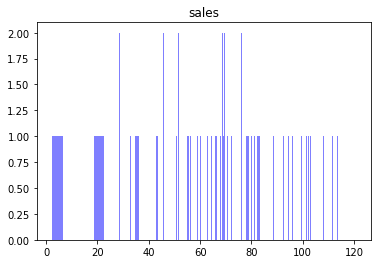

In [65]:
#Cheking the Distribution and Equality of Variance
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro,wilcoxon
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot as plt
plt.title('sales')
plt.hist(sales,facecolor='blue', alpha=0.5)
plt.show()

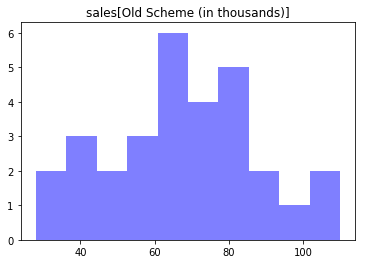

In [66]:
plt.title('sales[Old Scheme (in thousands)]')
plt.hist(sales['Old Scheme (in thousands)'],facecolor='blue', alpha=0.5)
plt.show()

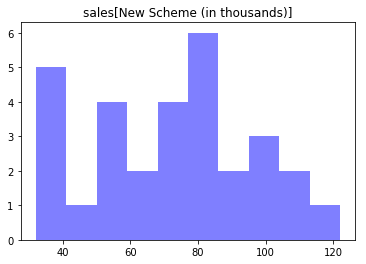

In [67]:
plt.title('sales[New Scheme (in thousands)]')
plt.hist(sales['New Scheme (in thousands)'],facecolor='blue', alpha=0.5)
plt.show()

In [68]:
ststs,p_value1=shapiro(sales['Old Scheme (in thousands)'])
print('old scheme p_value:', p_value1)
ststs,p_value2=shapiro(sales['New Scheme (in thousands)'])
print('new scheme p_value:', p_value2)
#Null hypothesis: Distribution is normal

old scheme p_value: 0.9813658595085144
new scheme p_value: 0.5057420134544373


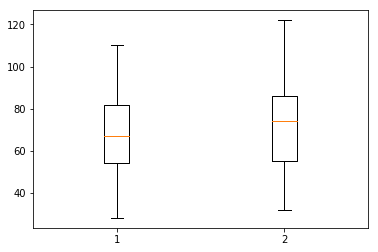

In [69]:
old_new=[sales['Old Scheme (in thousands)'],sales['New Scheme (in thousands)']]
plt.boxplot(old_new)
plt.show()

In [70]:
levene(sales['Old Scheme (in thousands)'],sales['New Scheme (in thousands)'])
## Null Hypothesis: Variances are equal

LeveneResult(statistic=1.063061539437244, pvalue=0.30679836081811235)

In [71]:
#Q2: Paired 2-Sample Parametric
t_statistic, p_value3 = ttest_1samp(sales['Old Scheme (in thousands)'] - sales['New Scheme (in thousands)'], 0)
print('p_value:', p_value3)
#Null Hypothesis: Not having any impact despite of the new scheme introduced

p_value: 0.13057553961337662


In [72]:
#Q3: The test (p-value) leads to is "new scheme has not significantly raised outputs"

In [73]:
#Q4:

# 4 a) The probability of a type 1 error:
# alpha or sigificance level= 5% or 0.05
# Null Hypothesis Ho: average output <=5000 i.e., p-value > 0.05

In [77]:
# 4 b) p- value of the hypothesis test if we test for a difference of $5000:
# From the given dataset we are having a difference of 4000 (average outut)
# In order to test with a difference of 5000, we need to make the average output to have a differnce of 5000
# To achieve that increase the value of sales['New Scheme (in thousands)'] by 1 to make the average output as 73
sales['New Scheme (in thousands) diff. 5']= sales['New Scheme (in thousands)'] + 1
mean_new_diff5 = np.mean(sales['New Scheme (in thousands) diff. 5'])
print('mean_new_diff5:',mean_new_diff5)

mean_new_diff5: 73.03333333333333


In [79]:
act_diff = mean_new_diff5 - mean_old
print('act_diff:',act_diff)
t_statistic, p_value4 = ttest_1samp(sales['Old Scheme (in thousands)'] - sales['New Scheme (in thousands) diff. 5'], 0)
print('p_value:', p_value4)
# Null Hypothesis: Based on the p- value of the hypothesis test when we test for a difference of $5000,
# Fail to reject the Null Hypothesis i.e., accept  NUll Hypothesis and reject  Alternate Hypothesis

act_diff: 5.0
p_value: 0.06154216863016692


In [76]:
# 4 c) Power of the test

print('\n c) Power of the test:')
effect_size=(np.mean(sales['Old Scheme (in thousands)']) - np.mean(sales['New Scheme (in thousands) diff. 5'])) / np.sqrt(((30-1)*np.var(sales['Old Scheme (in thousands)'])+(30-1)*np.var(sales['New Scheme (in thousands) diff. 5'])) / 30+30-2)
print('effect_size:',effect_size)
print('Power of the test:',ttest_power(effect_size, nobs=30, alpha=0.05, alternative='two-sided'))


 c) Power of the test:
effect_size: -0.16136944391462052
Power of the test: 0.1369959901147692
